# Sampling

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
T = 10
T_points = 10000

t = np.linspace(0, T, T_points).reshape(1,-1)
t.shape

(1, 10000)

In [34]:
print(f'Sampling frequency used for plotting = {T_points/T} Hz')

Sampling frequency used for plotting = 1000.0 Hz


#### Generate Monotone Signal

In [35]:
freq = 1
omega = 2*np.pi*freq

amp = 1

phase = 0

x_t = amp*np.cos(omega*t+phase)
x_t.shape

(1, 10000)

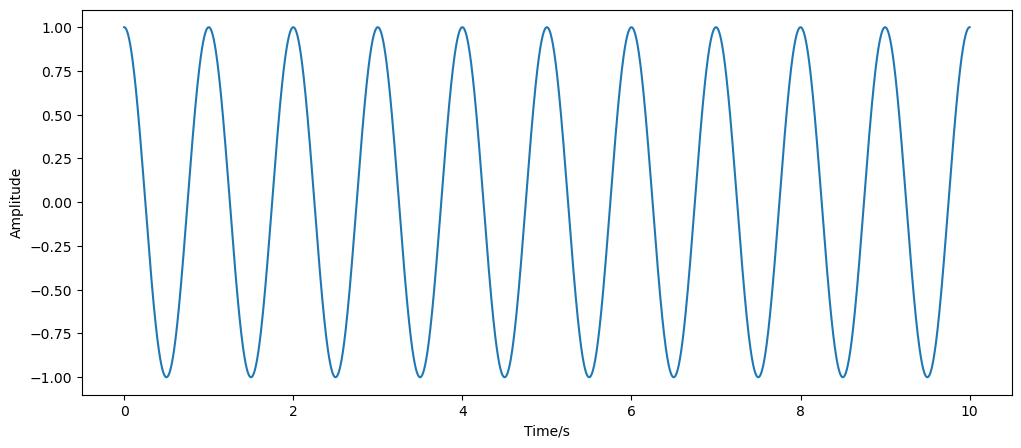

Angular Frequency = 6.283185307179586 rad/s


In [36]:
plt.figure(figsize=(12,5))
plt.plot(t.T, x_t.T)            # plot command needs column matrix or 1D vector
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.show()

print(f'Angular Frequency = {omega} rad/s')

## Define Spectrum Plotting Function

Numpy FFT function is used

In [37]:
def plot_spectrum(x_t, REMOVE = 1, fs = T_points/T, mode='c'):
    N = len(x_t.T)
    x_f =np.fft.fftshift(np.abs(np.fft.fft(x_t))).reshape(-1)[REMOVE:-REMOVE]/N
    f = np.fft.fftshift(np.fft.fftfreq(N)*fs)[REMOVE:-REMOVE]
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude")
    plt.title("Frequency Spectrum")
    if mode=='d':
        plt.scatter(f,x_f)
    else:
        plt.plot(f,x_f)
    return f, x_f
    

(array([-100. ,  -99.9,  -99.8, ...,   99.7,   99.8,   99.9]),
 array([9.83267478e-09, 9.85272457e-09, 9.87283462e-09, ...,
        9.89300517e-09, 9.87283462e-09, 9.85272457e-09]))

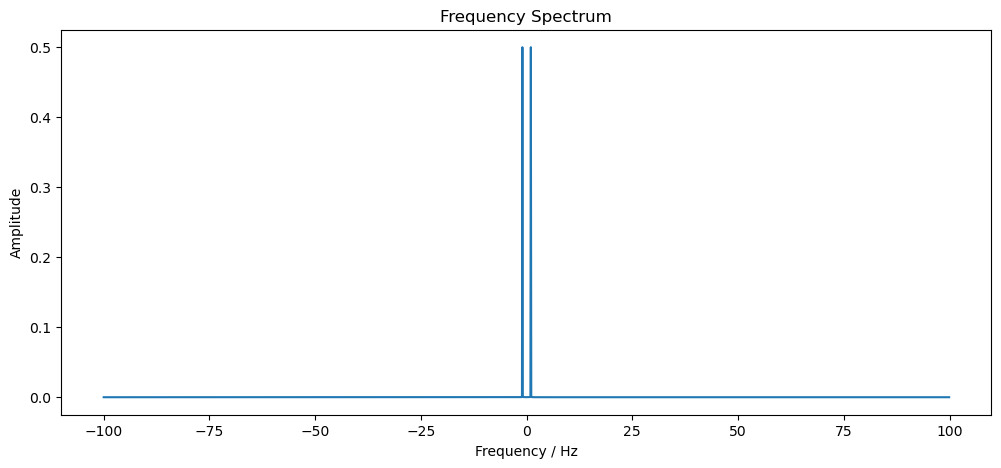

In [38]:
plt.figure(figsize=(12,5))
plot_spectrum(x_t, REMOVE=4000)

## Generate Sampling Pulse Train

In [39]:
# Sampling frequency

fs = 20

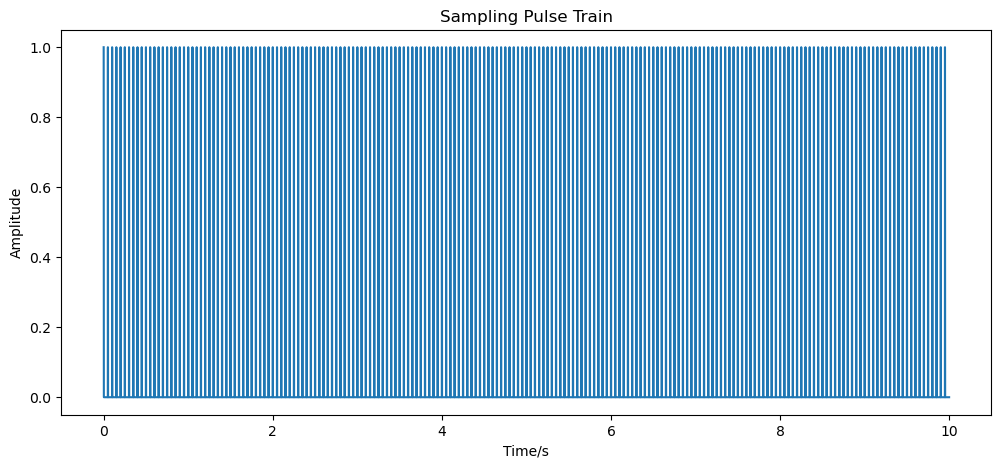

In [40]:
pulse_train = 0*t
n = T_points//(T*fs)
pulse_train[:,::n] = 1

plt.figure(figsize=(12,5))
plt.title("Sampling Pulse Train")
plt.plot(t.T, pulse_train.T)
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.show()

### Spectrum 

(array([-499.9, -499.8, -499.7, ...,  499.6,  499.7,  499.8]),
 array([0., 0., 0., ..., 0., 0., 0.]))

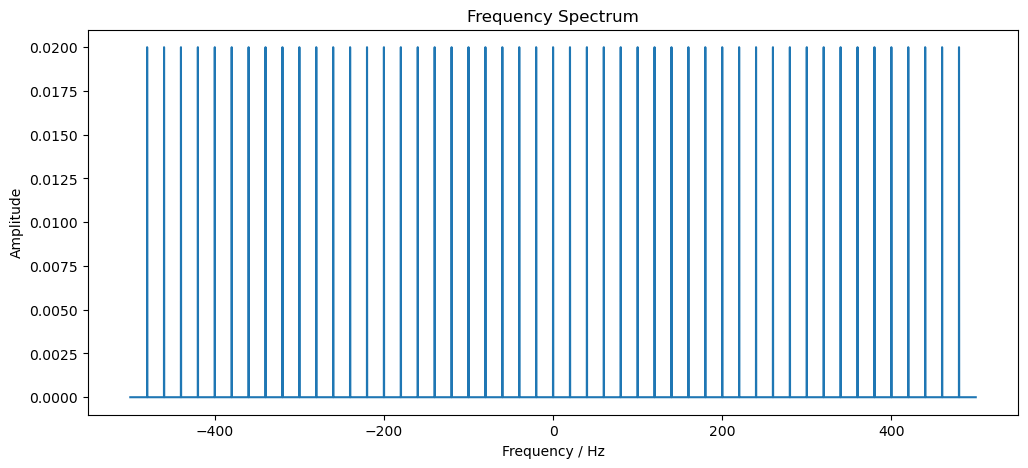

In [41]:
plt.figure(figsize=(12,5))
plot_spectrum(pulse_train)

## Sampled Signal - Monotone

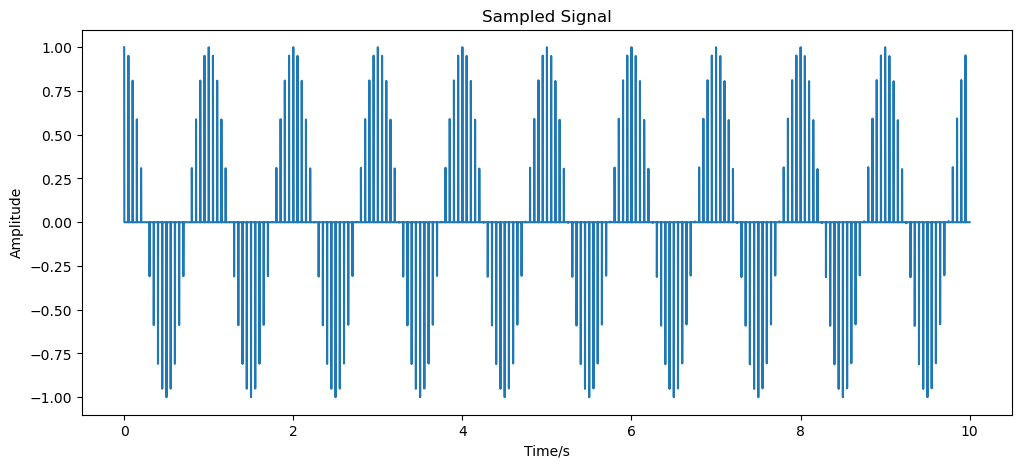

In [42]:
x_sampled = x_t*pulse_train

plt.figure(figsize=(12,5))
plt.title("Sampled Signal")
plt.plot(t.T, x_sampled.T)
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.show()

(array([-499.9, -499.8, -499.7, ...,  499.6,  499.7,  499.8]),
 array([2.00469143e-06, 2.06780691e-06, 2.18224539e-06, ...,
        2.36534233e-06, 2.18224539e-06, 2.06780691e-06]))

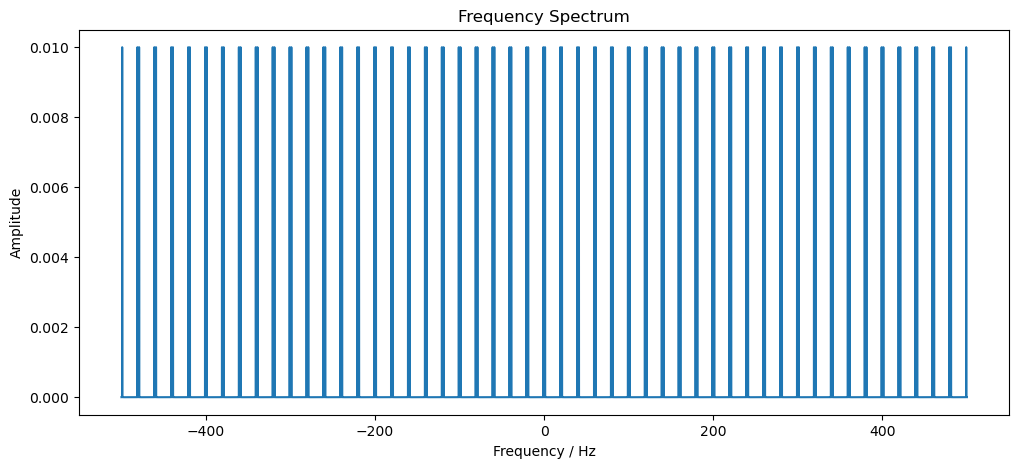

In [43]:
plt.figure(figsize=(12,5))
plot_spectrum(x_sampled)

## Multitone Signal

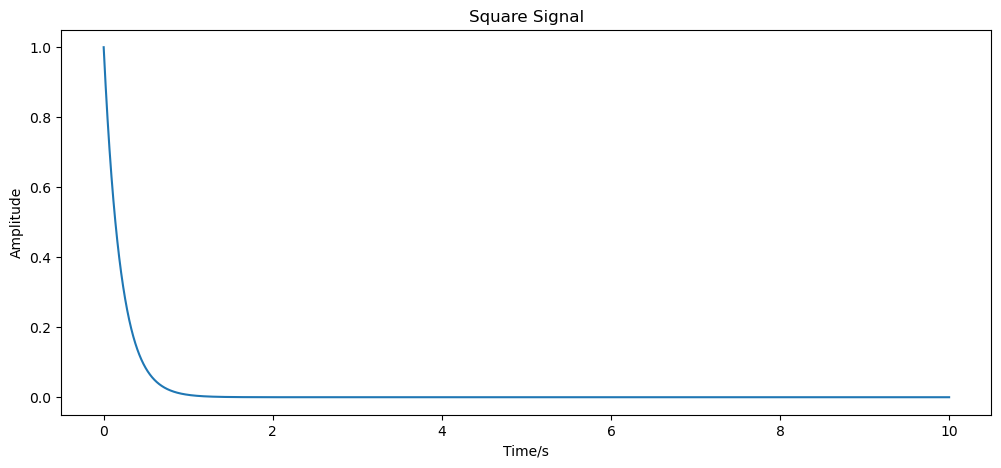

In [66]:
# x_mul = 0*t
# x_mul[:,T_points//4:3*T_points//4] = 1

x_mul = np.exp(-5*t)

plt.figure(figsize=(12,5))
plt.title("Square Signal")
plt.plot(t.T, x_mul.T)
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.show()

(array([-100. ,  -99.9,  -99.8, ...,   99.7,   99.8,   99.9]),
 array([0.0001622 , 0.00016236, 0.00016252, ..., 0.00016268, 0.00016252,
        0.00016236]))

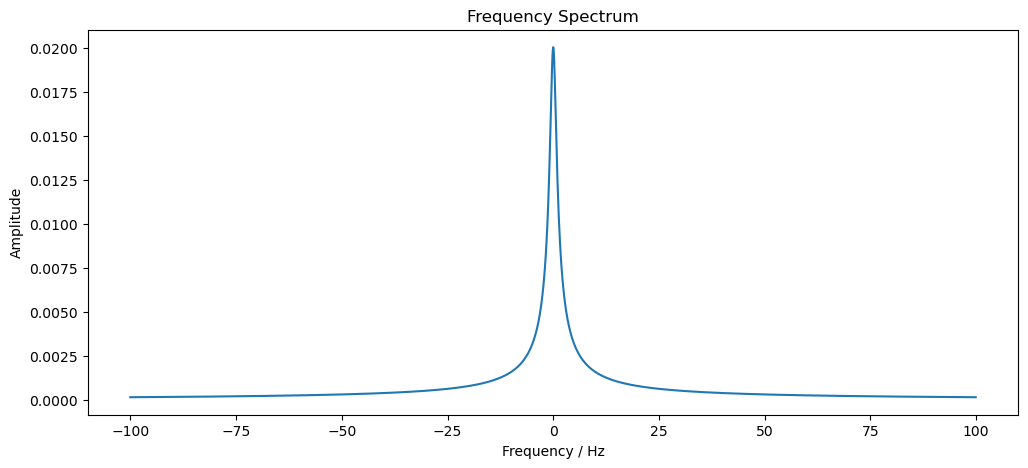

In [67]:
plt.figure(figsize=(12,5))
plot_spectrum(x_mul, REMOVE=4000)

### Sampled

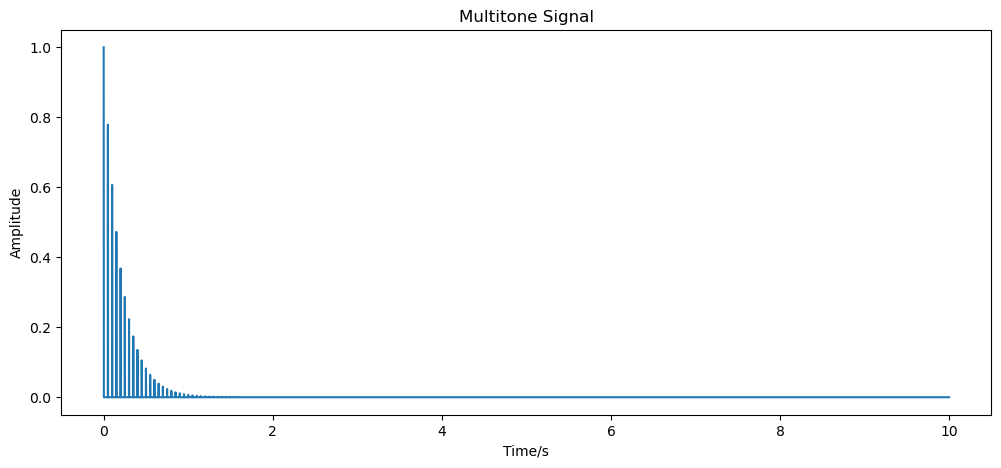

In [68]:
x_mul_sampled = x_mul*pulse_train

plt.figure(figsize=(12,5))
plt.title("Multitone Signal")
plt.plot(t.T, x_mul_sampled.T)
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.show()

(array([-499.9, -499.8, -499.7, ...,  499.6,  499.7,  499.8]),
 array([0.00044853, 0.00043848, 0.00042314, ..., 0.00040416, 0.00042314,
        0.00043848]))

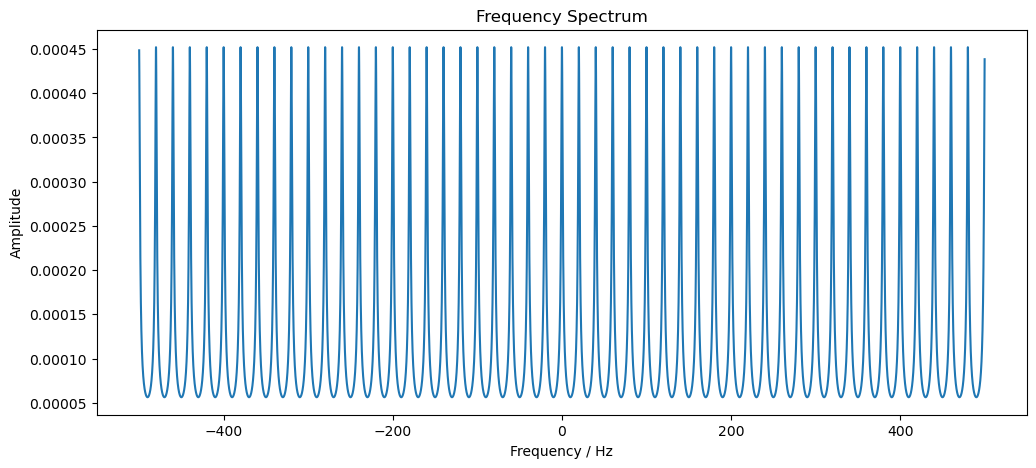

In [69]:
plt.figure(figsize=(12,5))
plot_spectrum(x_mul_sampled)

## "Discrete" Domain

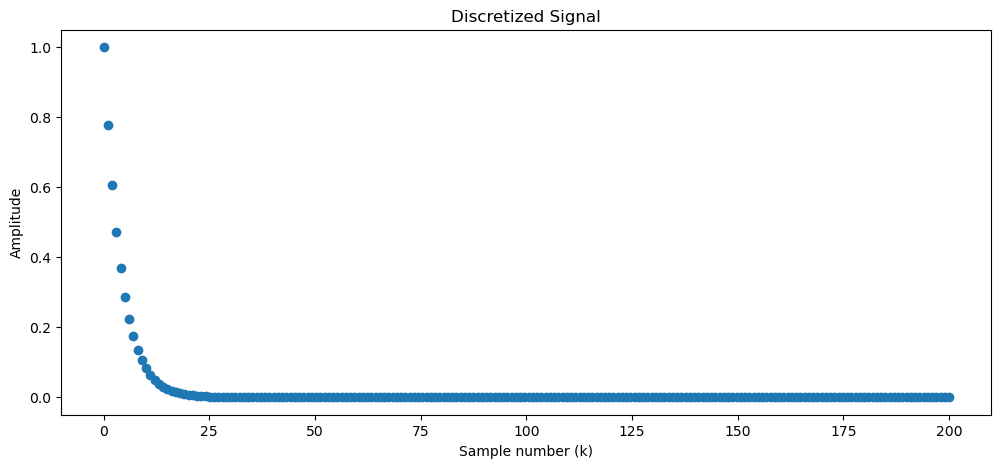

In [70]:
x_k = x_mul[pulse_train==1]
k = np.linspace(0,len(x_k), len(x_k))

plt.figure(figsize=(12,5))
plt.title("Discretized Signal")
plt.scatter(k, x_k)
plt.xlabel("Sample number (k)")
plt.ylabel("Amplitude")
plt.show()

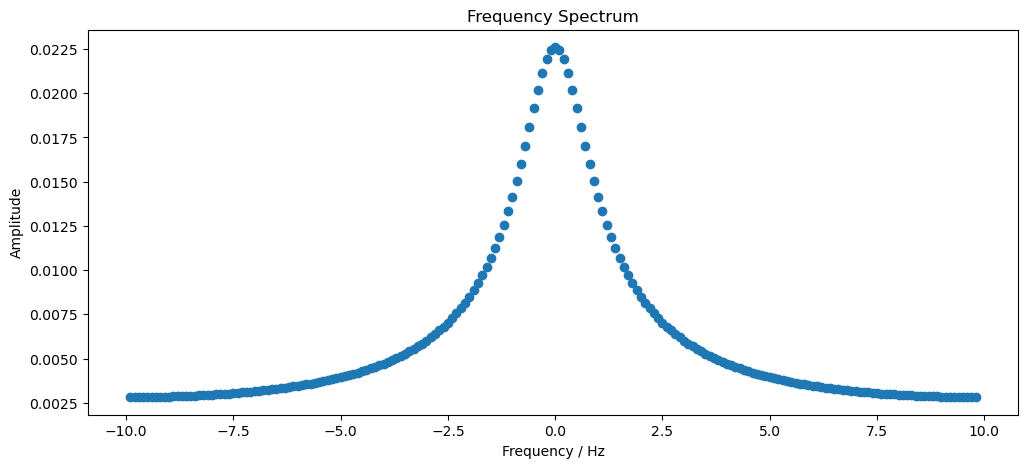

In [71]:
plt.figure(figsize=(12,5))
f,x_f = plot_spectrum(x_k, fs=fs, mode='d')